In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv("income.csv")
data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [3]:
y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
rf = AdaBoostClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000, random_state=42)

In [12]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8443034087419388

In [13]:
confusion_matrix(y_test, y_pred)

array([[7121,  293],
       [1228, 1127]], dtype=int64)

In [8]:
n_estimators_list = [10, 50, 100, 200, 500, 1000]
accuracies = []

for n in n_estimators_list:
    rf = AdaBoostClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with n_estimators={n}: {accuracy:.4f}")

Accuracy with n_estimators=10: 0.8241
Accuracy with n_estimators=50: 0.8351
Accuracy with n_estimators=100: 0.8381
Accuracy with n_estimators=200: 0.8408
Accuracy with n_estimators=500: 0.8441
Accuracy with n_estimators=1000: 0.8443


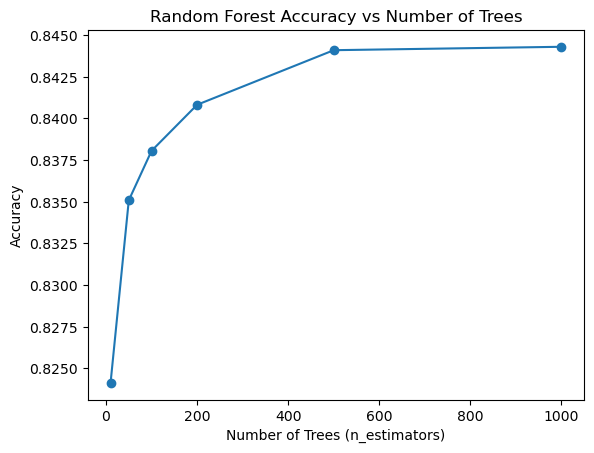

In [9]:
plt.plot(n_estimators_list, accuracies, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.show()

In [10]:
optimal_n_estimators = n_estimators_list[np.argmax(accuracies)]
print(f"Best accuracy is obtained with n_estimators={optimal_n_estimators}")

Best accuracy is obtained with n_estimators=1000
